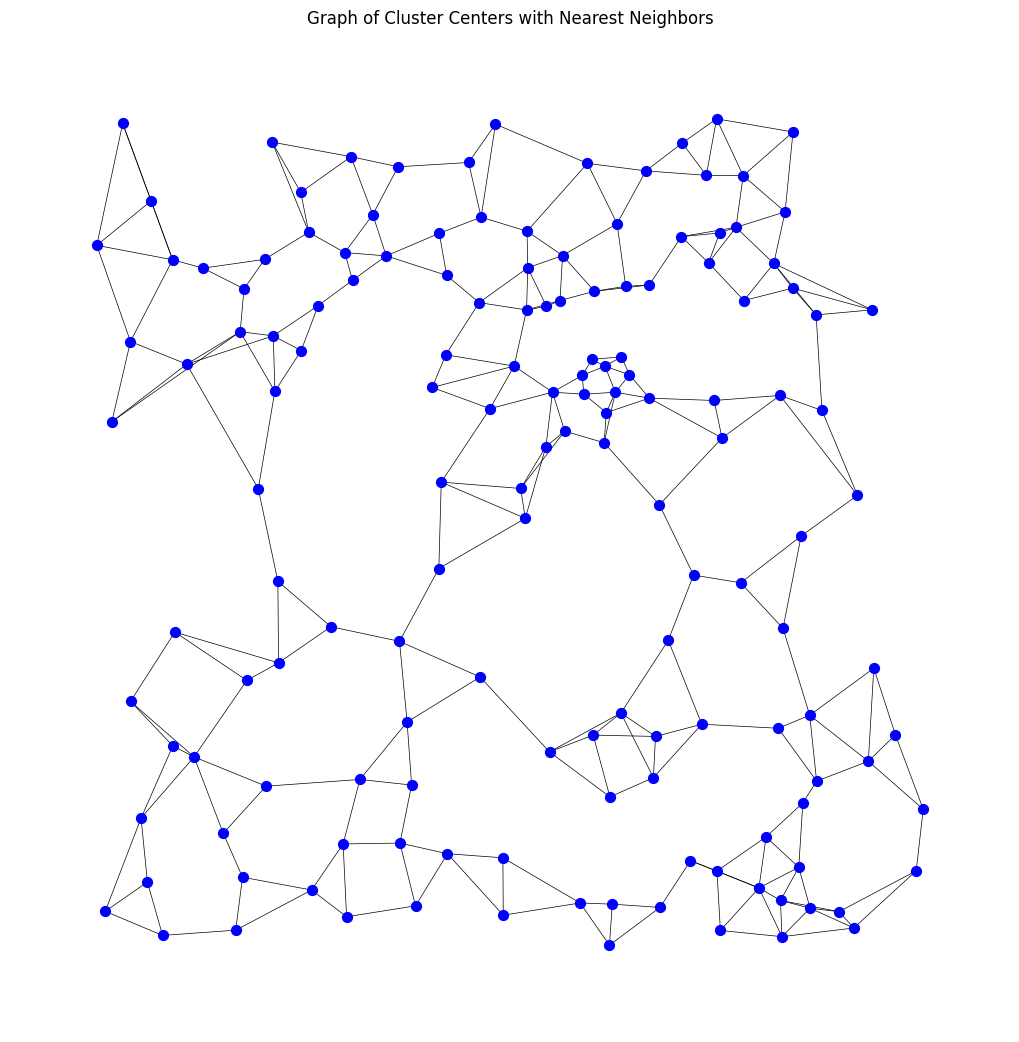

In [ ]:

# Create a graph
graph = nx.Graph()

# Add nodes (cluster centers) to the graph
for i, center in enumerate(cluster_centers):
  graph.add_node(i, pos=(center[1], center[0]))  # Use longitude, latitude as position

# Add edges based on nearest neighbors
for i in range(n_clusters):
  distances_from_i = []
  for j in range(n_clusters):
    if i != j:
      dist = np.linalg.norm(cluster_centers[i] - cluster_centers[j])
      distances_from_i.append((j, dist))
  distances_from_i.sort(key=lambda x: x[1])  # Sort by distance
  nearest_neighbors = [neighbor[0] for neighbor in distances_from_i[:3]]  # Connect to the 3 nearest neighbors

  for neighbor in nearest_neighbors:
    graph.add_edge(i, neighbor)  # Add edge between current node and its neighbor


# Get node positions from the node attributes
pos = nx.get_node_attributes(graph, 'pos')

# Draw the graph with improved aesthetics
plt.figure(figsize=(10, 10))  # Adjust figure size as needed
nx.draw(graph, pos, with_labels=False, node_size=50, node_color='blue', edge_color='black', width=0.5)
plt.title('Graph of Cluster Centers with Nearest Neighbors')
plt.show()

In [ ]:
import numpy as np
import networkx as nx

# Node positions as features (use the cluster center coordinates)
node_features_for_edge = {i: center for i, center in enumerate(cluster_centers)}

# Initialize a dictionary for edge embeddings
edge_embeddings = {}

# Define a function for computing edge embedding using the difference method
def compute_edge_embedding(node1, node2):
    return node1*1000 - node2*1000

# Compute edge embeddings using the difference method
for edge in graph.edges:
    # print(edge)
    node1 = np.array(pos[edge[0]])
    node2 = np.array(pos[edge[1]])
    # print(node1)
    edge_embeddings[edge] = compute_edge_embedding(node1, node2)
    # print("qqqqqqqqqq")
    # print(edge_embeddings[edge])
    # print("d")
    # print(edge)


# Display some edge embeddings
print("Edge Embeddings (Difference Method):")
for edge, embedding in list(edge_embeddings.items()):  # Show first 5 embeddings
    print(f"Edge {edge}: Embedding {embedding}")
    pass


Edge Embeddings (Difference Method):
Edge (0, 78): Embedding [-1.06981707 -2.44333747]
Edge (0, 134): Embedding [ 2.64241753 -2.21053636]
Edge (0, 111): Embedding [0.25482273 3.61406818]
Edge (0, 41): Embedding [-5.08386818 -1.73536732]
Edge (1, 55): Embedding [ 5.61663333 -1.27613333]
Edge (1, 69): Embedding [-6.55060833  0.49175   ]
Edge (1, 91): Embedding [3.77366667 6.25216667]
Edge (1, 30): Embedding [-6.58823333  7.37443333]
Edge (2, 88): Embedding [-1.74009813  1.95362869]
Edge (2, 105): Embedding [ 3.42124363 -0.41839768]
Edge (2, 29): Embedding [ 6.91707315 -1.35392054]
Edge (2, 51): Embedding [-9.11228018 -4.90590721]
Edge (3, 141): Embedding [ 5.564875 -1.21195 ]
Edge (3, 86): Embedding [2.98805357 5.73726429]
Edge (3, 144): Embedding [-8.326725 -0.5125  ]
Edge (4, 19): Embedding [-5.00019401  5.33511232]
Edge (4, 113): Embedding [-5.237025 -8.316875]
Edge (4, 129): Embedding [-7.5069625  6.6523625]
Edge (5, 89): Embedding [-4.29687976 -3.32960833]
Edge (5, 115): Embedding [